#📌 Extracción

## 🗂️ Importación de datos desde la API de Telecom X

In [2]:
import requests
import pandas as pd

In [3]:
# En este paso, cargamos los datos directamente desde la API publicada en GitHub.
# La fuente contiene información de clientes, incluyendo datos demográficos,
# tipos de servicios contratados y estado de cancelación del servicio (churn).

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [4]:
# Realizamos la solicitud HTTP a la URL
response = requests.get(url)

In [5]:
# Convertimos la respuesta en formato JSON a una estructura de Python
datos = response.json()

In [6]:
# Cargamos los datos en un DataFrame de pandas
df = pd.DataFrame(datos)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [7]:
# "aplanando" la estructura del JSON, transformándola en un DataFrame tabular (df_n) donde cada campo del JSON
 # (incluso los que están dentro de diccionarios o listas) se convierte en una columna.
df_aplanado = pd.json_normalize(datos)
df_aplanado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
# Verificar la forma
df_aplanado.shape

(7267, 21)

In [9]:
# Verificar columnas del DataFrame
df_aplanado.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [10]:
#Explorar los tipos de datos y valores faltantes:
df_aplanado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

## Análisis de valores únicos por columna

Para entender mejor la diversidad y posibles categorías en cada variable, realizamos un conteo de valores únicos por columna. Esto ayuda a:

- Identificar variables categóricas con pocas categorías (por ejemplo, género, tipo de contrato).
- Detectar posibles columnas con muchos valores distintos que pueden requerir tratamiento especial (como IDs o valores numéricos continuos).
- Facilitar la inspección de las categorías presentes en variables relevantes, cuando su cantidad es manejable (menos de 50 valores únicos).

El siguiente código imprime la cantidad de valores únicos por columna, y muestra los valores concretos para aquellas con menos de 50 categorías.


In [11]:
# Mostrar la cantidad de valores únicos por columna
# e imprimir los valores únicos solo si son menos de 50 para mejor legibilidad
for col in df_aplanado.columns:
    num_unicos = df_aplanado[col].nunique()
    print(f"Columna '{col}' tiene {num_unicos} valores únicos.")

    if num_unicos < 50:
        print(f"Valores únicos en '{col}':")
        print(df_aplanado[col].unique())

    print('-' * 50)  # Línea divisoria para claridad visual


Columna 'customerID' tiene 7267 valores únicos.
--------------------------------------------------
Columna 'Churn' tiene 3 valores únicos.
Valores únicos en 'Churn':
['No' 'Yes' '']
--------------------------------------------------
Columna 'customer.gender' tiene 2 valores únicos.
Valores únicos en 'customer.gender':
['Female' 'Male']
--------------------------------------------------
Columna 'customer.SeniorCitizen' tiene 2 valores únicos.
Valores únicos en 'customer.SeniorCitizen':
[0 1]
--------------------------------------------------
Columna 'customer.Partner' tiene 2 valores únicos.
Valores únicos en 'customer.Partner':
['Yes' 'No']
--------------------------------------------------
Columna 'customer.Dependents' tiene 2 valores únicos.
Valores únicos en 'customer.Dependents':
['Yes' 'No']
--------------------------------------------------
Columna 'customer.tenure' tiene 73 valores únicos.
--------------------------------------------------
Columna 'phone.PhoneService' tiene 2 va

In [12]:
# Verificar si hay filas duplicadas
num_duplicados = df_aplanado.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicados}")

Número de filas duplicadas: 0


In [13]:
# Mostrar cantidad de valores nulos en todas las columnas
print("Cantidad de valores nulos por columna:")
print(df_aplanado.isnull().sum())

Cantidad de valores nulos por columna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [14]:
# Contar celdas vacías o con solo espacios en blanco en cada columna
blancos = df_aplanado.apply(lambda x: x.astype(str).str.strip() == '').sum()

print("Cantidad de valores vacíos o en blanco por columna:")
print(blancos)


Cantidad de valores vacíos o en blanco por columna:
customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total         11
dtype: int64


In [15]:
# Convertir la columna 'account.Charges.Total' a tipo numérico (float)
# Los valores que no se puedan convertir quedarán como NaN (por ejemplo, valores vacíos o erróneos)
df_aplanado['account.Charges.Total'] = pd.to_numeric(df_aplanado['account.Charges.Total'], errors='coerce')

# Confirmamos el nuevo tipo de dato
print("Tipo de dato de 'account.Charges.Total':", df_aplanado['account.Charges.Total'].dtype)


Tipo de dato de 'account.Charges.Total': float64


In [16]:
# Eliminar filas donde la columna 'Churn' está vacía o solo con espacios
df_aplanado = df_aplanado[df_aplanado['Churn'].str.strip() != '']

print("Número de filas después de eliminar valores vacíos en 'Churn':", len(df_aplanado))


Número de filas después de eliminar valores vacíos en 'Churn': 7043


In [17]:
# Contar valores vacíos o en blanco (strings vacíos o solo espacios)
espacios_vacios = df_aplanado.apply(lambda x: x.astype(str).str.strip() == '').sum()

print("Cantidad de valores vacíos o en blanco por columna:")
print(espacios_vacios)


Cantidad de valores vacíos o en blanco por columna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [18]:
# Crear una nueva columna llamada 'Cuentas_Diarias'
# calculando el valor diario a partir del cargo mensual ('account.Charges.Monthly')
df_aplanado['Cuentas_Diarias'] = df_aplanado['account.Charges.Monthly'] / 30

# Mostrar las primeras filas de las columnas relevantes para verificar que el cálculo esté correcto
print(df_aplanado[['account.Charges.Monthly', 'Cuentas_Diarias']].head())


   account.Charges.Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


In [19]:
df_aplanado = df_aplanado.drop('Cuentas_Diarias', errors='ignore')

In [20]:
df_aplanado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [21]:
# Renombramos columnas para que sean más claras y legibles
# Esto ayuda a entender mejor el contenido del dataset, sobre todo si se comparte con terceros.
df_aplanado = df_aplanado.rename(columns={
    'customer.gender': 'Sexo',
    'customer.SeniorCitizen': 'Jubilado/a',
    'customer.Partner': 'Pareja/Conyugue',
    'customer.Dependents': 'Personas_a_cargo',
    'customer.tenure': 'Meses_Contrato_Cliente',
    'account.Contract': 'Tipo_de_Contrato',
    'account.PaperlessBilling': 'Pago_online',
    'account.PaymentMethod': 'Forma_de_Pago',
})

In [22]:
# Unificamos valores 'No internet service' y 'No phone service' a 'No' para simplificar categorías
columnas_unificar = [
    'phone.MultipleLines',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies'
]

for col in columnas_unificar:
    df_aplanado[col] = df_aplanado[col].replace({
        'No internet service': 'No',
        'No phone service': 'No'
    })


In [23]:
df_aplanado.head(15)


,customerID,Churn,Sexo,Jubilado/a,Pareja/Conyugue,Personas_a_cargo,Meses_Contrato_Cliente,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,Tipo_de_Contrato,Pago_online,Forma_de_Pago,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45,2.313333
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25,3.656667
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.80,2.821667
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35,1.606667
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.90,3.015000


#📊 Carga y análisis

In [24]:
df_aplanado.describe()

,Jubilado/a,Meses_Contrato_Cliente,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


**Se realizó un análisis exploratorio básico de las variables numéricas mediante la función .describe() de Pandas. Se identificó que la mayoría de los clientes no son adultos mayores, que la antigüedad promedio es de 32 meses, y que hay una alta variabilidad en el total de cargos, indicando clientes con distinta antigüedad y comportamiento de gasto. Esta información servirá como base para detectar patrones de abandono (churn) y segmentar a los usuarios.**

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#📊Distribución de evasión

In [26]:
# Suponemos que df_aplanado ya contiene los datos limpios cargados del archivo
# Visualizamos la proporción general de clientes que se dieron de baja o no (Churn)
fig = px.pie(
    df_aplanado,
    names='Churn',
    title='Proporción general de clientes que abandonaron o permanecen',
    color='Churn',
    color_discrete_map={'Yes': 'red', 'No': 'green'}
)
fig.show()


#📊 Distribución de la evasión segun variables categoricas

##📊 Gráficos ─ distribución de evasión segun sexo

In [27]:
# Creamos una tabla de frecuencia cruzada entre Sexo y Churn
df_sexo_churn = df_aplanado.groupby(['Sexo', 'Churn']).size().reset_index(name='Cantidad')

# Creamos un gráfico de barras
fig = px.bar(
    df_sexo_churn,
    x='Sexo',
    y='Cantidad',
    color='Churn',
    barmode='group',
    title='Distribución de Evasión por Sexo',
    color_discrete_sequence=['#636EFA', '#EF553B']
)

fig.show()


##📊 Gráficos ─ distribución de evasión según el Tipo de Contrato

In [28]:
# Gráfico de torta para mostrar la proporción de cada tipo de contrato en el dataset

fig = px.pie(
    df_aplanado,
    names='Tipo_de_Contrato',
    title='Distribución de Tipo de Contrato entre clientes',
    hole=0.3
)

fig.show()


In [29]:
# Gráfico de barras para comparar la evasión según el tipo de contrato
fig = px.histogram(df_aplanado, x='Tipo_de_Contrato', color='Churn', barmode='group',
                   title='Distribución de Evasión según Tipo de Contrato',
                   labels={'Tipo_de_Contrato': 'Tipo de Contrato', 'Churn': 'Evasión'},
                   color_discrete_map={'No': 'green', 'Yes': 'red'})

# Mostramos el gráfico
fig.show()


##📊 Graficos ─ Evasión según Forma de Pago

In [30]:
# Gráfico de torta para mostrar la proporción de cada método de pago en el dataset

fig = px.pie(
    df_aplanado,
    names='Forma_de_Pago',  # columna categórica a representar
    title='Distribución de Métodos de Pago entre clientes',
    hole=0.3  # agrega un pequeño hueco para estilo tipo "donut"
)

fig.update_traces(textposition='inside', textinfo='percent+label')  # muestra etiquetas y porcentaje
fig.show()


In [31]:
# Gráfico de barras para comparar la evasión según el método de pago
# Muy útil para detectar si ciertos métodos de pago están más asociados al abandono.
fig = px.histogram(
    df_aplanado,  # usamos el DataFrame limpio
    x='Forma_de_Pago',  # variable categórica a analizar
    color='Churn',  # variable objetivo (evasión sí/no)
    barmode='group',  # agrupamos por evasión
    title='Distribución de Evasión según Método de Pago',
    labels={'Forma_de_Pago': 'Método de Pago', 'Churn': 'Evasión'},
    color_discrete_map={'No': '#1F77B4', 'Yes': '#D62728'}  # colores: verde = no churn, rojo = churn
)

fig.update_layout(xaxis_tickangle=-45)  # giramos las etiquetas para mejor lectura
fig.show()


##📊 Graficos ─ Churn según Tipo de servicio de Internet

In [32]:
# Gráfico de torta para visualizar la proporción de cada tipo de servicio de Internet
fig = px.pie(
    df_aplanado,
    names='internet.InternetService',  # la misma variable categórica
    hole=0.3,                          # estilo donut
    title='Distribución de Tipos de Servicio de Internet entre clientes'
)

# Muestra el porcentaje dentro de cada porción
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
# Da contexto sobre qué tan representada está cada categoría en la base,
# complementando al gráfico de barras.



In [33]:
# Barras agrupadas para comparar la evasión (Churn) según el tipo de servicio de Internet
fig = px.histogram(
    df_aplanado,                       # DataFrame limpio
    x='internet.InternetService',      # variable categórica
    color='Churn',                     # evasión: Yes / No
    barmode='group',                   # barras lado a lado
    text_auto=True,                    # muestra valores sobre las barras
    title='Evasión según Tipo de Servicio de Internet',
    labels={
        'internet.InternetService': 'Tipo de Servicio de Internet',
        'Churn': 'Evasión'
    },
    color_discrete_map={'No': '#1f77b4',  # azul para no abandono
                        'Yes': '#ff7f0e'} # naranja para abandono
)

fig.update_layout(xaxis_tickangle=-15)    # gira etiquetas para mejor lectura
fig.show()
# Permite ver rápidamente si los clientes de DSL,
# fibra óptica o sin servicio de internet abandonan en distintas proporciones.

##📊 Graficos ─ Churn según Servicio Telefónico



In [34]:
# Gráfico de torta para mostrar la proporción de clientes con y sin servicio telefónico
fig = px.pie(
    df_aplanado,
    names='phone.PhoneService',
    hole=0.3,
    title='Distribución del Servicio Telefónico entre clientes'
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [35]:
# Barras agrupadas para comparar la evasión según si tienen servicio telefónico
fig = px.histogram(
    df_aplanado,
    x='phone.PhoneService',  # columna que indica si el cliente tiene servicio telefónico
    color='Churn',           # evasión (Sí/No)
    barmode='group',         # barras una al lado de otra
    text_auto=True,
    title='Evasión según Servicio Telefónico',
    labels={
        'phone.PhoneService': 'Servicio Telefónico',
        'Churn': 'Evasión'
    },
    color_discrete_map={
        'No': '#2ca02c',   # verde para no abandono
        'Yes': '#d62728'   # rojo para abandono
    }
)

fig.update_layout(xaxis_tickangle=-15)
fig.show()
# permite detectar si hay una diferencia significativa en la evasión
# entre clientes con o sin servicio telefónico.

##📊 Graficos ─ Churn según Si tiene personas a cargo o no

In [36]:
#Nos ayuda a entender si tener dependientes influye en la permanencia del cliente.
df_depend = df_aplanado.groupby(['Personas_a_cargo', 'Churn']).size().reset_index(name='Cantidad')

fig = px.bar(df_depend,
             x='Personas_a_cargo',
             y='Cantidad',
             color='Churn',
             barmode='group',
             color_discrete_map={'Yes': '#FFBB78', 'No': '#98DF8A'},
             title='Clientes con personas a cargo vs abandono (Churn)',
             labels={'Personas_a_cargo': '¿Tiene personas a cargo?'})

fig.update_traces(hovertemplate='%{x}<br>Clientes: %{y}')
fig.show()


##📊 Graficos ─ Churn según Si tiene o no Pareja

In [37]:
# Gráfico de barras agrupadas para comparar abandono según si tiene o no Pareja
fig = px.histogram(
    df_aplanado,
    x='Pareja/Conyugue',
    color='Churn',
    barmode='group',
    text_auto=True,
    color_discrete_map={'No': 'navy', 'Yes': 'seagreen'},
    title='Abandono con pareja o sin pareja'
)

fig.update_layout(
    xaxis_title='con o sin pareja',
    yaxis_title='Cantidad de Clientes',
    legend_title='Abandono (Churn)'
)

fig.show()


##📊 Grafico de Distribucion de suscripcion a Streaming Movies segmentada por estado de Churn

In [38]:
# Distribución de suscripción a Streaming Movies segmentada por estado de Churn
fig = px.histogram(
    df_aplanado,
    x='internet.StreamingMovies',
    color='Churn',
    barmode='group',
    title='Suscripción a Streaming Movies según estado de Churn',
    color_discrete_sequence=px.colors.qualitative.Pastel1
)
fig.update_layout(
    xaxis_title='Suscripción a Streaming Movies',
    yaxis_title='Cantidad de clientes'
)
fig.show()

##📊 Histograma segun servicios contratados por tipo de Internet y churn


In [39]:
# Creamos histograma apilado
fig = px.histogram(
    df_aplanado,
    x='internet.InternetService',
    color='Churn',
    facet_col='internet.InternetService',
    barmode='group',
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Pastel1,
    title='Distribución de servicios contratados por tipo de Internet y churn'
)

fig.update_traces(opacity=0.8)
fig.show()



##📊 Grafico Torta Proporción de clientes con y sin Facturación Electrónica

In [40]:
# Gráfico de torta para distribución de facturación electrónica
fig = px.pie(
    df_aplanado,
    names='Pago_online',
    hole=0.3,
    title='Distribución del uso de Facturación Electrónica entre clientes'
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


##📊 Grafico de evasión según Facturación Electrónica

In [41]:
# Gráfico de barras agrupadas para evasión según facturación electrónica
fig = px.histogram(
    df_aplanado,
    x='Pago_online',  # columna que indica si el cliente usa facturación electrónica
    color='Churn',                 # evasión (Sí/No)
    barmode='group',               # barras una al lado de otra
    text_auto=True,
    title='Evasión según Facturación Electrónica',
    labels={
        'Pago_online': 'Facturación Electrónica',
        'Churn': 'Evasión'
    },
    color_discrete_map={
        'No': '#2ca02c',  # verde = no evasión
        'Yes': '#d62728'  # rojo = evasión
    }
)

fig.update_layout(xaxis_tickangle=-15)
fig.show()


#📊 Graficos categoricos combinados


## Churn segun Jubilado/a con y sin Pareja

In [42]:
#Esto nos ayuda a entender si estar jubilado o tener pareja influye en el abandono.
fig = px.histogram(
    df_aplanado,
    x='Pareja/Conyugue',
    color='Churn',
    barmode='group',
    facet_col='Jubilado/a',
    text_auto=True,
    title='Churn según pareja y condición de jubilado/a',
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.update_layout(yaxis_title='Cantidad de clientes')
fig.show()


##📊 Grafico Box, segun Pagos mensuales por personas a cargo y Situacion de pareja vs Churn

In [43]:
fig = px.box(
    df_aplanado,
    x='Personas_a_cargo',
    y='account.Charges.Monthly',
    color='Churn',
    facet_col='Pareja/Conyugue',
    points='all',
    notched=True,
    title='Cargos mensuales por personas a cargo y situación de pareja vs Churn',
    color_discrete_sequence=px.colors.qualitative.Vivid
)
fig.show()

##📊 Grafico de barras entre combiancion de servicios de streaming, servicios de internet y servicio telefonico vs Churn

In [44]:
# Creamos una nueva columna con combinación de servicios
df_aplanado['Servicios_Contratados'] = df_aplanado[['internet.StreamingTV', 'phone.PhoneService', 'internet.InternetService']].agg('-'.join, axis=1)

In [45]:
# Gráfico de barras interactivas
fig = px.histogram(
    df_aplanado,
    x='Servicios_Contratados',
    color='Churn',
    barmode='group',
    text_auto=True,
    title='Relación entre combinación de servicios contratados y Churn',
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig.update_layout(xaxis_title='Servicios contratados', yaxis_title='Cantidad de clientes')
fig.show()


##📊 Grafico combinado de Tipo de contrato y Forma de pago vs Churn

In [46]:
# Analizamos la relación entre el tipo de contrato, la forma de pago y el abandono (Churn)
# Usamos un heatmap para ver qué combinaciones presentan más evasión
df_heat = df_aplanado.groupby(['Tipo_de_Contrato', 'Forma_de_Pago', 'Churn']).size().reset_index(name='Cantidad')

fig = px.density_heatmap(
    df_heat,
    x='Tipo_de_Contrato',
    y='Forma_de_Pago',
    z='Cantidad',
    facet_col='Churn',
    color_continuous_scale='delta',
    title='Tipo de Contrato y Forma de Pago vs Churn (Clientes vs Evasores)'
)
fig.show()

# 📊Conteo de evasión por variables numéricas

##📊 Grafico de Cantidad de clientes segun Pagos mensuales y Churn

In [47]:
# Redondeamos los cargos mensuales para agrupar
df_interactivo = df_aplanado[['account.Charges.Monthly', 'Churn']].copy()
df_interactivo['account.Charges.Monthly'] = df_interactivo['account.Charges.Monthly'].round()

# Agrupamos y contamos por cargo y abandono
df_interactivo = df_interactivo.groupby(['account.Charges.Monthly', 'Churn']).size().reset_index(name='Cantidad')

# Creamos gráfico de líneas interactivo con tooltip
fig = px.line(df_interactivo,
              x='account.Charges.Monthly',
              y='Cantidad',
              color='Churn',
              markers=True,
              line_shape='linear',
              color_discrete_map={'Yes': '#FF7F0E', 'No': '#1F77B4'},
              title='Cantidad de clientes según pagos mensuales y abandono (Churn)',
              labels={
                  'account.Charges.Monthly': 'Pagos Mensuales (redondeado)',
                  'Cantidad': 'Cantidad de clientes',
                  'Churn': 'Churn'
              })

# Mostramos el gráfico
fig.show()




##📊 Grafico del Total Facturado vs Churn

In [48]:
#Con esto identificamos si los clientes que se fueron pagaron más o menos en total que los que se quedaron.
fig = px.histogram(df_aplanado,
                   x='account.Charges.Total',
                   color='Churn',
                   nbins=40,
                   barmode='stack',
                   color_discrete_map={'Yes': '#8C564B', 'No': '#2CA02C'},
                   title='Total facturado vs abandono (Churn)',
                   labels={'account.Charges.Total': 'Total facturado ($)'})

fig.update_traces(hovertemplate='Total: %{x}<br>Cantidad: %{y}')
fig.show()


##📈 Grafico Box -Total gastado vs Chunr


In [49]:
# Boxplot del total gastado según evasión
fig = px.box(
    df_aplanado,
    x='Churn',
    y='account.Charges.Total',
    color='Churn',
    title='Distribución del Total Gastado según Evasión',
    labels={'Churn': 'Evasión', 'account.Charges.Total': 'Total Gastado'},
    color_discrete_map={'No': '#2ca02c', 'Yes': '#d62728'}
)

fig.show()
#Este boxplot revela si los clientes que evaden tienden a gastar menos en total que los que permanecen.

##📊 Grafico histograma Total gastado + densidad por evasión

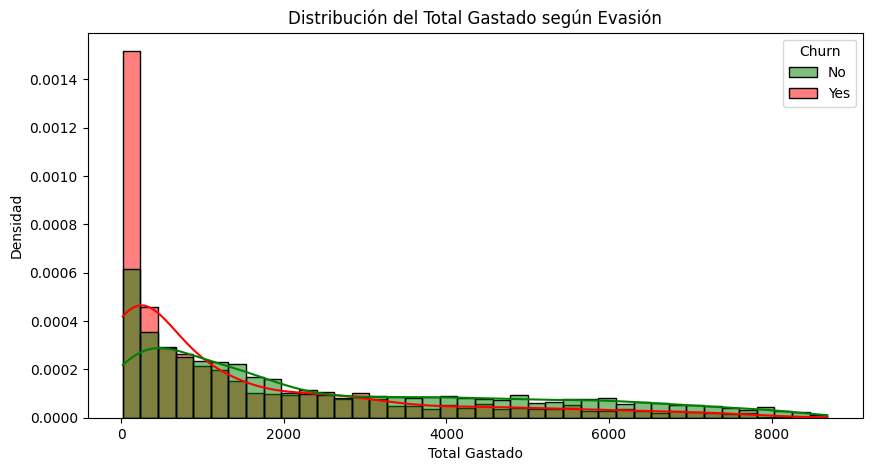

In [50]:
plt.figure(figsize=(10, 5))

# Histograma con curva de densidad para cada grupo de evasión
sns.histplot(
    data=df_aplanado,
    x='account.Charges.Total',
    hue='Churn',
    kde=True,
    stat='density',
    common_norm=False,
    palette={'No': 'green', 'Yes': 'red'},
    bins=40
)

plt.title('Distribución del Total Gastado según Evasión')
plt.xlabel('Total Gastado')
plt.ylabel('Densidad')
plt.show()
# Este gráfico permite ver si los evasores se concentran en ciertos rangos de gasto total.

##📈 Tiempo de permanencia vs Churn

In [51]:
# Boxplot de tiempo en el servicio según evasión
fig = px.box(
    df_aplanado,
    x='Churn',
    y='Meses_Contrato_Cliente',
    color='Churn',
    title='Distribución del Tiempo de Contrato según Evasión',
    labels={'Churn': 'Evasión', 'Meses_Contrato_Cliente': 'Meses de Servicio'},
    color_discrete_map={'No': '#2ca02c', 'Yes': '#d62728'}
)

fig.show()


##📊Grafico Tiempo de contrato promedio por grupo de evasión

In [52]:
# Agrupamos por evasión y calculamos el promedio de meses (tenure)
tenure_promedio = df_aplanado.groupby('Churn')['Meses_Contrato_Cliente'].mean().reset_index()

# Gráfico de barras
fig = px.bar(
    tenure_promedio,
    x='Churn',
    y='Meses_Contrato_Cliente',
    color='Churn',
    text=tenure_promedio['Meses_Contrato_Cliente'].round(1),
    color_discrete_map={'No': 'green', 'Yes': 'red'},
    title='Promedio de Tiempo de Contrato según Evasión',
    labels={'Meses_Contrato_Cliente': 'Meses de Contrato Promedio', 'Churn': 'Evasión'}
)

fig.update_traces(textposition='outside')
fig.update_layout(showlegend=False)
fig.show()
# Este gráfico muestra si los que cancelan lo hacen antes de acumular muchos meses de servicio,
# lo que puede indicar insatisfacción temprana

##📊 Gasto mensual con gráfico de densidad

In [53]:
fig = px.histogram(
    df_aplanado,
    x='account.Charges.Monthly',
    color='Churn',
    marginal='rug',  # Línea de densidad adicional en el eje
    nbins=50,
    opacity=0.7,
    histnorm='probability density',
    title='Distribución del Gasto Mensual según Evasión',
    labels={'account.Charges.Monthly': 'Gasto Mensual', 'Churn': 'Evasión'},
    color_discrete_map={'No': 'green', 'Yes': 'red'},
    hover_data={'account.Charges.Monthly': ':.2f', 'Churn': True}
)

fig.update_layout(bargap=0.1)
fig.show()

# Ideal para ver si quienes pagan más mensualmente tienden a cancelar.

##📊 Histograma Cuentas diarias vs Churn

In [54]:
px.histogram(df_aplanado, x = 'Cuentas_Diarias', text_auto = True, color = 'Churn', barmode = 'group')

##📊 Grafico de Tasa de Churn por Meses de Contrato

In [55]:
# Agrupar por tenure y Churn
df_grouped = df_aplanado.groupby(['Meses_Contrato_Cliente', 'Churn']).size().unstack(fill_value=0)

In [56]:
# Calcular el % de churn por tenure
df_grouped['churn_rate'] = (df_grouped.get('Yes', 0) / df_grouped.sum(axis=1)) * 100

# Mostrar el resultado
print(df_grouped[['churn_rate']])

Churn                   churn_rate
Meses_Contrato_Cliente            
0                         0.000000
1                        61.990212
2                        51.680672
3                        47.000000
4                        47.159091
...                            ...
68                        9.000000
69                        8.421053
70                        9.243697
71                        3.529412
72                        1.657459

[73 rows x 1 columns]


In [57]:
# Agrupamos los datos por meses de contrato y calculamos la tasa de churn
fig = px.line(df_grouped.reset_index(),
              x='Meses_Contrato_Cliente',
              y='churn_rate',
              markers=True,
              title='Tasa de Churn (%) por meses de contrato')
fig.show()
# Este gráfico permite identificar en qué momento del contrato los clientes tienden a cancelar
# Los puntos marcados ayudan a detectar picos de evasión en ciertos meses críticos

#📊 Variables númericas combinadas

##📊 Comparativa conjunta: Total gastado vs tiempo de servicio (scatter plot)

In [58]:
# Gráfico de dispersión entre Total Charges y Tenure, con color por evasión
fig = px.scatter(
    df_aplanado,
    x='Meses_Contrato_Cliente',
    y='account.Charges.Total',
    color='Churn',
    title='Relación entre Tiempo de Servicio y Total Gastado',
    labels={
        'Mese_de_Contrato_Cliente': 'Meses de Servicio',
        'account.Charges.Total': 'Total Gastado',
        'Churn': 'Evasión'
    },
    color_discrete_map={'No': 'green', 'Yes': 'red'},
    opacity=0.5
)

fig.show()
#  Este gráfico permite ver si hay grupos que cancelan a pesar de haber gastado mucho o haber estado poco tiempo

##📊 Grafico combinado de Cuentas diarias, Jubilado/a o no vs Churn

In [59]:
# Gráfico de área para mostrar tendencias acumuladas de churn según jubilación y Cuentas diarias
df_area = df_aplanado.groupby(['Cuentas_Diarias', 'Jubilado/a', 'Churn']).size().reset_index(name='Cantidad')
fig = px.area(
    df_area,
    x='Cuentas_Diarias',
    y='Cantidad',
    color='Churn',
    facet_col='Jubilado/a',
    color_discrete_sequence=px.colors.sequential.Rainbow,
    title='Tendencia de churn según uso de cuentas diarias y jubilación'
)
fig.show()


##📊 Grafico combinado de Gastos totales, si es Jubilado/a vs Churn

In [60]:
# Comparamos los gastos totales según si el cliente es jubilado/a y si abandonó el servicio
fig = px.histogram(
    df_aplanado,
    x='account.Charges.Total',
    color='Churn',
    facet_row='Jubilado/a',
    nbins=50,
    barmode='overlay',
    title='Gastos totales por cliente según Jubilación y Churn',
    color_discrete_sequence=px.colors.qualitative.Safe_r
)
fig.update_traces(opacity=0.7)
fig.show()


In [74]:
df_aplanado.to_excel('Telecom_Completado.xlsx')

#📄Informe final

Mostrar siempre los detalles

Copiar
from IPython.display import Markdown

# Volvemos a definir la plantilla tras el reset del estado
markdown_template = """
# 📊 Informe Final - Análisis de Evasión de Clientes en TelecomX

## 🔹 Introducción

El presente análisis tiene como objetivo estudiar el fenómeno de **evasión de clientes (churn)** en la empresa TelecomX. A través de la exploración de variables categóricas y numéricas del dataset, se busca identificar patrones y factores que influyen en la cancelación del servicio por parte de los clientes.

---

## 🔹 Limpieza y Tratamiento de Datos

Se realizaron los siguientes pasos para preparar los datos:

- Carga del dataset original en formato CSV.
- Separación de variables anidadas en columnas individuales.
- Conversión de tipos de datos incorrectos (por ejemplo, valores numéricos como strings).
- Reemplazo y estandarización de etiquetas para facilitar la interpretación.
- Eliminación o imputación de valores faltantes si correspondía.

---

## 🔹 Análisis Exploratorio de Datos

A continuación se presentan los análisis realizados sobre las variables categóricas y numéricas, acompañados de visualizaciones para facilitar la comprensión:

---

### 📁 Análisis de Variables Categóricas

#### 🟩 Tipo de Contrato y Evasión

Se observa que los clientes con **contrato mensual** presentan una mayor tasa de evasión comparado con contratos anuales o bianuales. Esto sugiere que la duración del compromiso puede estar relacionada con la fidelidad del cliente.
Graficos usados: Histograma de Tipo de Contrato vs. Evasión/Gráfico de Torta de Tipo de Contrato

In [62]:
# Gráfico de barras para comparar la evasión según el tipo de contrato
fig = px.histogram(df_aplanado, x='Tipo_de_Contrato', color='Churn', barmode='group',
                   title='Distribución de Evasión según Tipo de Contrato',
                   labels={'Tipo_de_Contrato': 'Tipo de Contrato', 'Churn': 'Evasión'},
                   color_discrete_map={'No': 'green', 'Yes': 'red'})

# Mostramos el gráfico
fig.show()


In [63]:
# Gráfico de torta para mostrar la proporción de cada tipo de contrato en el dataset

fig = px.pie(
    df_aplanado,
    names='Tipo_de_Contrato',
    title='Distribución de Tipo de Contrato entre clientes',
    hole=0.3
)

fig.show()


#### 📞 Servicio Telefónico y Evasión

Los clientes que no tienen activado el servicio telefónico muestran una leve menor tasa de evasión. Esto podría implicar que el paquete de telefonía no es un factor decisivo para mantener el servicio.
Graficos usados:  Histograma - PhoneService vs Churn


In [64]:
# Barras agrupadas para comparar la evasión según si tienen servicio telefónico
fig = px.histogram(
    df_aplanado,
    x='phone.PhoneService',  # columna que indica si el cliente tiene servicio telefónico
    color='Churn',           # evasión (Sí/No)
    barmode='group',         # barras una al lado de otra
    text_auto=True,
    title='Evasión según Servicio Telefónico',
    labels={
        'phone.PhoneService': 'Servicio Telefónico',
        'Churn': 'Evasión'
    },
    color_discrete_map={
        'No': '#2ca02c',   # verde para no abandono
        'Yes': '#d62728'   # rojo para abandono
    }
)

fig.update_layout(xaxis_tickangle=-15)
fig.show()
# permite detectar si hay una diferencia significativa en la evasión
# entre clientes con o sin servicio telefónico.

#### 📃 Facturación sin Papel y Evasión

Los clientes con **facturación electrónica (Paperless Billing)** tienen una tasa de churn más alta, lo que podría estar asociado con un perfil más digital, joven o menos comprometido a largo plazo.
Graficos usados: Histograma - PaperlessBilling vs Churn

In [65]:
# Gráfico de barras agrupadas para evasión según facturación electrónica
fig = px.histogram(
    df_aplanado,
    x='Pago_online',  # columna que indica si el cliente usa facturación electrónica
    color='Churn',                 # evasión (Sí/No)
    barmode='group',               # barras una al lado de otra
    text_auto=True,
    title='Evasión según Facturación Electrónica',
    labels={
        'Pago_online': 'Facturación Electrónica',
        'Churn': 'Evasión'
    },
    color_discrete_map={
        'No': '#2ca02c',  # verde = no evasión
        'Yes': '#d62728'  # rojo = evasión
    }
)

fig.update_layout(xaxis_tickangle=-15)
fig.show()

### 📈 Análisis de Variables Numéricas

#### 💸 Gasto Mensual y Evasión

Se aprecia que la distribución del **gasto mensual** es distinta para los clientes que se dan de baja, especialmente en los valores más altos. Esto podría implicar que los clientes con facturas elevadas están más propensos a cancelar.
Graficos usados: Histograma - Densidad de gasto mensual con hover

In [66]:
fig = px.histogram(
    df_aplanado,
    x='account.Charges.Monthly',
    color='Churn',
    marginal='rug',  # Línea de densidad adicional en el eje
    nbins=50,
    opacity=0.7,
    histnorm='probability density',
    title='Distribución del Gasto Mensual según Evasión',
    labels={'account.Charges.Monthly': 'Gasto Mensual', 'Churn': 'Evasión'},
    color_discrete_map={'No': 'green', 'Yes': 'red'},
    hover_data={'account.Charges.Monthly': ':.2f', 'Churn': True}
)

fig.update_layout(bargap=0.1)
fig.show()

# Ideal para ver si quienes pagan más mensualmente tienden a cancelar.

#### ⏳ Tiempo de Contrato y Churn

Se observa que a menor cantidad de meses con la compañía, mayor es la tasa de churn. Los clientes con mayor antigüedad tienden a permanecer más tiempo, sugiriendo que la fidelización mejora con el tiempo.
Graficos usados: Línea - Tasa de churn por meses de contrato

In [67]:
# Agrupamos los datos por meses de contrato y calculamos la tasa de churn
fig = px.line(df_grouped.reset_index(),
              x='Meses_Contrato_Cliente',
              y='churn_rate',
              markers=True,
              title='Tasa de Churn (%) por meses de contrato')
fig.show()
# Este gráfico permite identificar en qué momento del contrato los clientes tienden a cancelar
# Los puntos marcados ayudan a detectar picos de evasión en ciertos meses críticos

## 🔍 Análisis adicional: Relación entre número de servicios y evasión

Este análisis busca entender si la cantidad de servicios contratados por el cliente tiene relación con la tasa de cancelación (Churn).

A través del siguiente gráfico de barras agrupadas, podemos observar cómo se distribuyen los clientes que cancelaron o no el servicio en función del total de servicios contratados. Este análisis es útil para identificar si los clientes que contratan más (o menos) servicios tienen más probabilidades de cancelar el contrato.

Además, permite orientar decisiones estratégicas como crear paquetes más atractivos o ajustar la oferta de servicios.


In [68]:
# Creamos una nueva variable que cuenta cuántos servicios tiene cada cliente
df_aplanado['Total_Servicios'] = (
    df_aplanado[['phone.PhoneService', 'internet.InternetService', 'internet.OnlineSecurity',
                 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport',
                 'internet.StreamingTV', 'internet.StreamingMovies']]
    .apply(lambda x: sum(x == 'Yes'), axis=1)
)

# Agrupamos por cantidad de servicios y evasión
fig = px.histogram(
    df_aplanado,
    x='Total_Servicios',
    color='Churn',
    barmode='group',
    text_auto=True,
    labels={'Total_Servicios': 'Cantidad de Servicios', 'Churn': 'Evasión'},
    title='Distribución de evasión según cantidad de servicios contratados',
    color_discrete_map={'Yes': 'red', 'No': 'green'}
)

fig.update_layout(
    xaxis=dict(dtick=1),
    yaxis_title='Cantidad de Clientes',
    legend_title='¿Canceló?'
)

fig.show()


### Análisis Combinado: Tipo de Contrato y Forma de Pago vs Evasión de Clientes

Para comprender mejor los patrones de evasión, se utilizó un mapa de calor (*heatmap*) que cruza las variables **Tipo de Contrato**, **Forma de Pago** y **Evasión (Churn)**.

Este gráfico permite identificar combinaciones específicas de contrato y método de pago donde se concentra una mayor cantidad de clientes que abandonan el servicio.

#### 🔍 Observaciones destacadas:

- En el panel de **clientes que abandonaron**, se observa una mayor concentración de evasión en los contratos de tipo **mes a mes**, especialmente cuando el método de pago es **electrónico sin factura (Paperless)**.
- Métodos como **transferencias automáticas desde cuenta bancaria** y **tarjetas de crédito** presentan una menor concentración de churn en contratos más largos (1 o 2 años).
- Las combinaciones con menor evasión están en los contratos de mayor duración combinados con métodos de pago más estables.

Este análisis sugiere que los clientes con contratos **flexibles y pagos electrónicos sin factura** tienen mayor propensión a abandonar el servicio, posiblemente por falta de compromiso a largo plazo o control automatizado de suscripciones.


In [69]:
# Analizamos la relación entre el tipo de contrato, la forma de pago y el abandono (Churn)
# Usamos un heatmap para ver qué combinaciones presentan más evasión
df_heat = df_aplanado.groupby(['Tipo_de_Contrato', 'Forma_de_Pago', 'Churn']).size().reset_index(name='Cantidad')

fig = px.density_heatmap(
    df_heat,
    x='Tipo_de_Contrato',
    y='Forma_de_Pago',
    z='Cantidad',
    facet_col='Churn',
    color_continuous_scale='delta',
    title='Tipo de Contrato y Forma de Pago vs Churn (Clientes vs Evasores)'
)
fig.show()

### Distribución de Métodos de Pago entre Clientes

Para obtener una visión general de cómo se distribuyen los métodos de pago entre los clientes, se utilizó un gráfico de torta (*pie chart*).

#### 🔍 Observaciones:

- Se observa una preferencia significativa por el método **electrónico sin factura (PaperlessBilling)**, lo cual puede estar relacionado con mayor comodidad, pero también con mayor volatilidad o menor compromiso.
- Métodos como **transferencia bancaria automática** y **tarjeta de crédito** también tienen una participación importante, especialmente entre clientes con contratos a más largo plazo.
- Estos datos sirven como base para cruzar esta variable con otras dimensiones, como el tipo de contrato, para analizar su relación con la evasión (ver sección siguiente).


In [70]:
# Gráfico de torta para mostrar la proporción de cada método de pago en el dataset

fig = px.pie(
    df_aplanado,
    names='Forma_de_Pago',  # columna categórica a representar
    title='Distribución de Métodos de Pago entre clientes',
    hole=0.3  # agrega un pequeño hueco para estilo tipo "donut"
)

fig.update_traces(textposition='inside', textinfo='percent+label')  # muestra etiquetas y porcentaje
fig.show()


## 🔄 Análisis de Correlaciones (Actividad Extra - Opcional)

Como paso adicional, se realizó un análisis de correlaciones entre las variables numéricas del dataset. Esto permite identificar qué factores tienen una relación más directa con la evasión (Churn), lo cual resulta útil para el desarrollo de modelos predictivos y estrategias de retención más precisas.

A continuación, se presenta una matriz de correlación que resume las relaciones entre variables como tiempo de contrato, cargos mensuales, total gastado, número de cuentas diarias y la variable de evasión.


/tmp/ipython-input-3542480772.py:11: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.



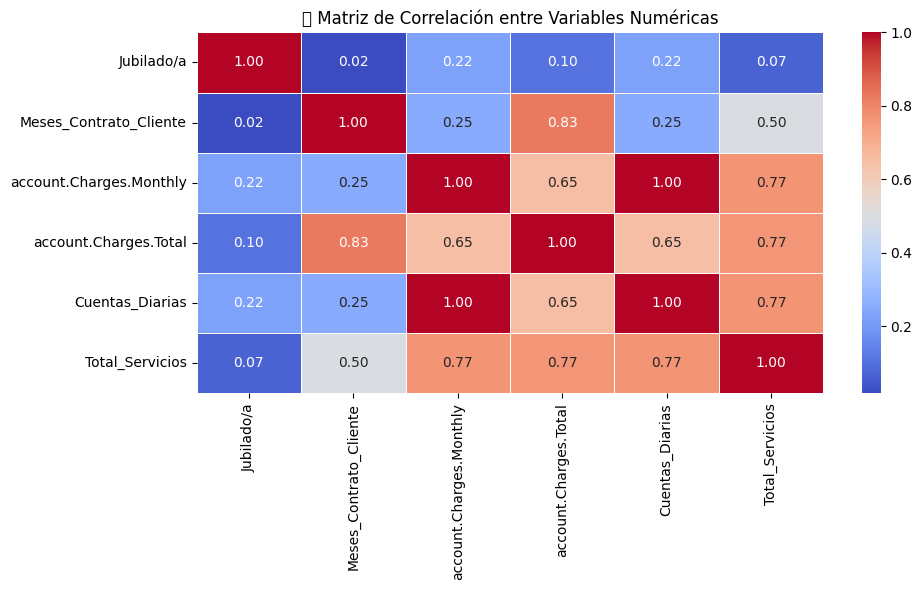

In [72]:
# Seleccionamos solo las columnas numéricas
df_numericas = df_aplanado.select_dtypes(include='number')

# Calculamos la matriz de correlación
correlaciones = df_numericas.corr()

# Visualizamos con un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔍 Matriz de Correlación entre Variables Numéricas")
plt.tight_layout()
plt.show()


### 📊 Relación entre Servicios Contratados y la Cuenta Diaria

Este gráfico busca explorar la conexión entre la cantidad de servicios contratados por un cliente y el valor promedio diario de su cuenta, diferenciando según su estado de evasión (Churn).

Se espera que los clientes con **mayor cantidad de servicios contratados** y **cuentas diarias más altas** tengan una **menor probabilidad de abandono**, dado que están más comprometidos con la empresa.

Además, se incluyen variables contextuales como los **meses de contrato** y el **total facturado**, accesibles al pasar el puntero por cada punto del gráfico, lo cual aporta una visión más completa del comportamiento del cliente.

Este tipo de visualización es útil para detectar patrones de compromiso, posibles segmentos vulnerables al abandono y zonas de oportunidad para estrategias de retención personalizadas.


In [73]:
# Gráfico de dispersión entre Servicios Contratados y Churn
fig = px.scatter(
    df_aplanado,
    x='Servicios_Contratados',
    y='Cuentas_Diarias',
    color='Churn',
    title='Relación entre Servicios Contratados y Cuentas Diarias según Evasión (Churn)',
    hover_data=['Meses_Contrato_Cliente', 'account.Charges.Total'],
    color_discrete_map={'No': 'green', 'Yes': 'red'}
)
fig.show()


## 🧠 Conclusiones e Insights Finales

A lo largo del análisis exploratorio, se identificaron patrones significativos que permiten comprender mejor las causas de evasión de clientes (Churn) en la empresa TelecomX LATAM:

- Los clientes con contratos de tipo **mensual** presentan tasas de evasión considerablemente **más altas** que aquellos con contratos a un año o dos años. Esto sugiere que la **duración del compromiso contractual** influye directamente en la fidelización del cliente.

- El método de pago también está relacionado con la evasión. Los usuarios que utilizan **pagos electrónicos con tarjeta de crédito** o **transferencia automática** tienen **menores tasas de abandono** en comparación con quienes usan **métodos manuales o mensuales**.

- Las variables relacionadas con servicios digitales como **seguridad en línea, backup y soporte técnico** mostraron que quienes **no utilizan estos servicios tienden a abandonar más** que los clientes que los tienen activos. Esto indica que la **percepción de valor agregado** influye en la decisión de permanecer.

- Las **variables numéricas** como `Meses_Contrato_Cliente` y `account.Charges.Total` tienen una correlación negativa con la evasión, reforzando que los **clientes antiguos y de mayor inversión son más leales**.

- Por el contrario, **el número de servicios contratados y la cuenta diaria** no mostraron correlaciones fuertes con churn, aunque siguen siendo importantes para evaluar el perfil de consumo del cliente.

---

## ✅ Recomendaciones Estratégicas

Con base en los hallazgos del análisis, se proponen las siguientes acciones para reducir la tasa de evasión:

1. **Incentivar contratos a largo plazo** mediante promociones o descuentos exclusivos, especialmente para nuevos clientes en sus primeros meses de servicio.

2. **Promover el uso de servicios complementarios** como seguridad en línea, backup y soporte técnico, resaltando su valor agregado y ofreciendo combos o beneficios por su adopción.

3. **Facilitar el acceso a métodos de pago automáticos**, como transferencias o débitos con tarjeta, mediante campañas de migración y beneficios adicionales para quienes cambien su forma de pago.

4. **Implementar alertas tempranas basadas en la antigüedad** del cliente y el tipo de contrato, para detectar posibles abandonos en sus etapas iniciales.

5. **Diseñar estrategias de retención personalizadas** para clientes con menor antigüedad y contratos mensuales, combinando mejoras en la experiencia del servicio, promociones y comunicación proactiva.

Este análisis proporciona una base sólida para acciones estratégicas enfocadas en la **retención**, mejorando la experiencia del cliente y reduciendo significativamente la evasión en TelecomX LATAM.
